In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Social Network Ads Dataset

## Import and Visualize Dataset

In [3]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df_new = df.drop(columns = ['User ID', 'Gender'])

X_train = df_new.iloc[:, :-1].to_numpy()
y_train = df_new.iloc[:, -1].to_numpy()
features = df_new.columns[:-1]
target = df_new.columns[-1]
m,n = X_train.shape

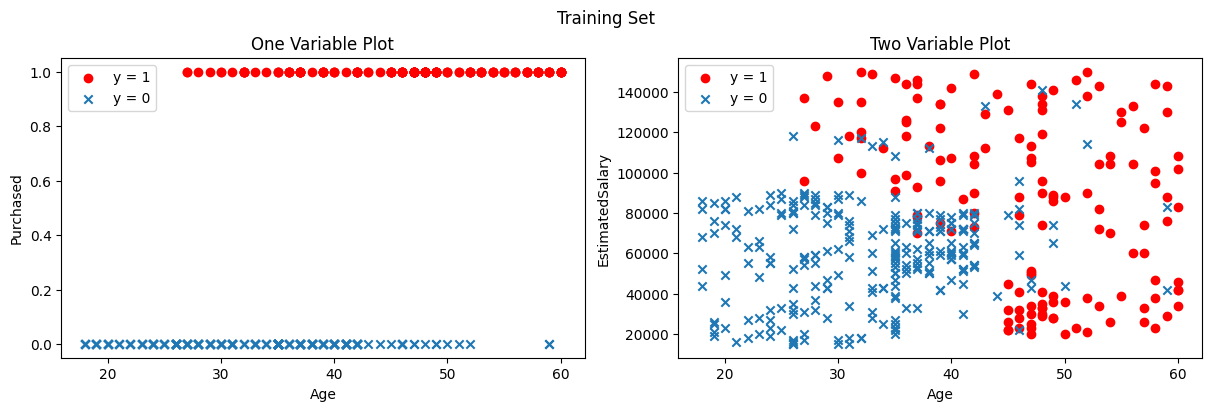

In [4]:
pos = y_train == 1
neg = y_train == 0

fig, ax = plt.subplots(1, n, figsize = (12, 4), constrained_layout = True)

ax[0].scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
ax[0].scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
ax[0].set_xlabel(features[0])
ax[0].set_ylabel(target)
ax[0].set_title('One Variable Plot')
ax[0].legend()

ax[1].scatter(X_train[pos, 0], X_train[pos, 1], marker = 'o', color = 'r', label = 'y = 1')
ax[1].scatter(X_train[neg, 0], X_train[neg, 1], marker = 'x', label = 'y = 0')
ax[1].set_xlabel(features[0])
ax[1].set_ylabel(features[1])
ax[1].set_title('Two Variable Plot')
ax[1].legend()

plt.suptitle('Training Set')
plt.savefig('figures/01.png')
plt.show()

## Try Linear Regression

In [5]:
w_in = np.zeros((n,))
b_in = 0.
iterations = 1000
alpha = 0.01

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
mu = scaler.mean_
sigma = np.sqrt(scaler.var_)

sgdr = SGDRegressor(max_iter = iterations, alpha = alpha)
sgdr.fit(X_norm, y_train, w_in, b_in)
w_norm = sgdr.coef_
b_norm = sgdr.intercept_

In [7]:
w_raw = w_norm / sigma
b_raw = b_norm - np.dot(w_norm, mu / sigma)

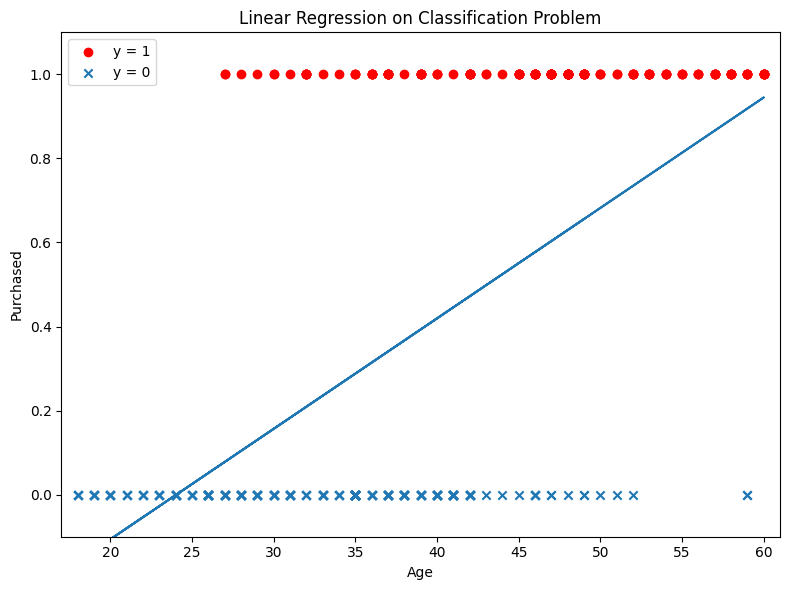

In [13]:
xlim_l, xlim_u = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1
ylim_l, ylim_u = -0.1, 1.1

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.legend()
plt.tight_layout()
plt.savefig('figures/02.png')
plt.show()

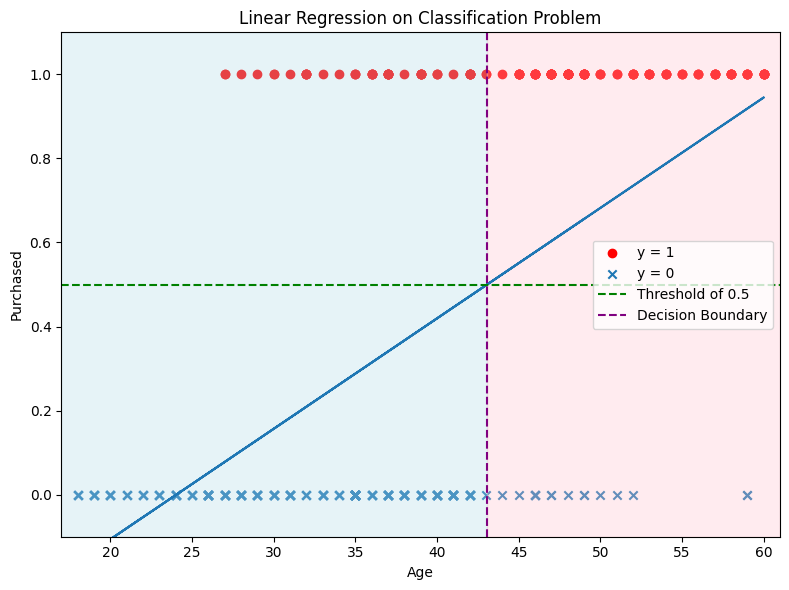

In [14]:
threshold = 0.5
decision_boundary = (threshold - (w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0])) / w_raw[0]

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.axhline(y = 0.5, color = 'green', linestyle = '--', label = 'Threshold of 0.5')
plt.axvline(x = decision_boundary, color = 'purple', linestyle = '--', label = 'Decision Boundary')
plt.fill_betweenx([ylim_l, ylim_u], xlim_l, decision_boundary, color = 'lightblue', alpha = 0.3)
plt.fill_betweenx([ylim_l, ylim_u], decision_boundary, xlim_u, color = 'pink', alpha = 0.3)

plt.legend()
plt.tight_layout()
plt.savefig('figures/02_threshold{}.png'.format(threshold))
plt.show()

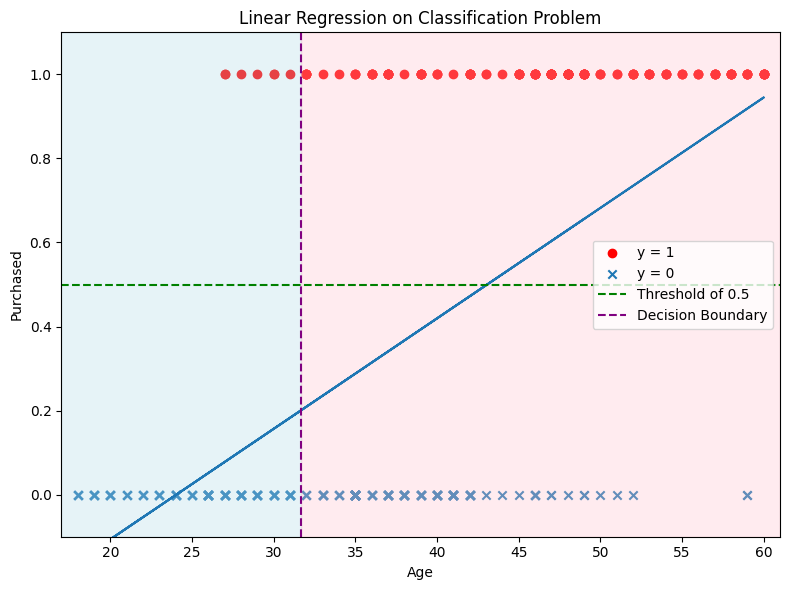

In [15]:
threshold = 0.2
decision_boundary = (threshold - (w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0])) / w_raw[0]

xlim_l, xlim_u = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1
ylim_l, ylim_u = -0.1, 1.1

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.axhline(y = 0.5, color = 'green', linestyle = '--', label = 'Threshold of 0.5')
plt.axvline(x = decision_boundary, color = 'purple', linestyle = '--', label = 'Decision Boundary')
plt.fill_betweenx([ylim_l, ylim_u], xlim_l, decision_boundary, color = 'lightblue', alpha = 0.3)
plt.fill_betweenx([ylim_l, ylim_u], decision_boundary, xlim_u, color = 'pink', alpha = 0.3)

plt.legend()
plt.tight_layout()
plt.savefig('figures/02_threshold{}.png'.format(threshold))
plt.show()

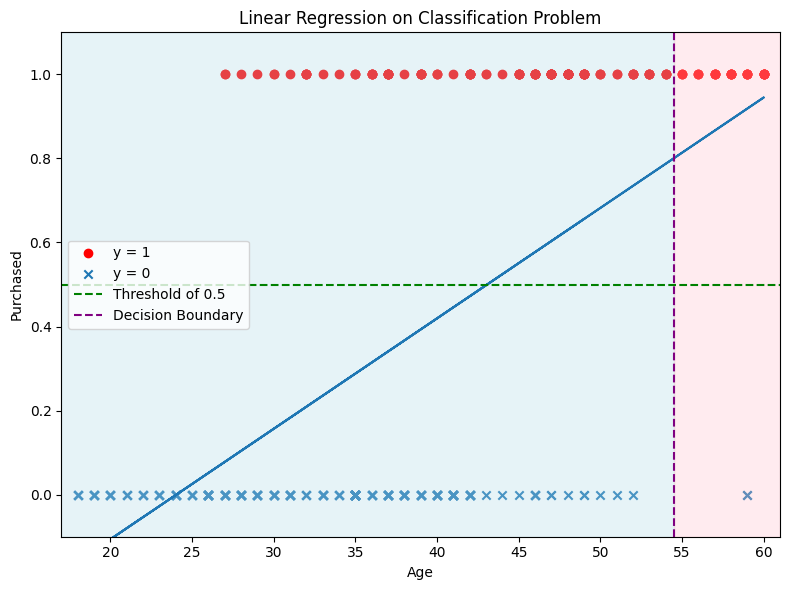

In [16]:
threshold = 0.8
decision_boundary = (threshold - (w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0])) / w_raw[0]

xlim_l, xlim_u = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1
ylim_l, ylim_u = -0.1, 1.1

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.axhline(y = 0.5, color = 'green', linestyle = '--', label = 'Threshold of 0.5')
plt.axvline(x = decision_boundary, color = 'purple', linestyle = '--', label = 'Decision Boundary')
plt.fill_betweenx([ylim_l, ylim_u], xlim_l, decision_boundary, color = 'lightblue', alpha = 0.3)
plt.fill_betweenx([ylim_l, ylim_u], decision_boundary, xlim_u, color = 'pink', alpha = 0.3)

plt.legend()
plt.tight_layout()
plt.savefig('figures/02_threshold{}.png'.format(threshold))
plt.show()